In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from tqdm import tqdm

## Generation of dataset

In [2]:
## A quadratic curve is taken as the function underlying the dataset with some random noise.
## The curve is given by y = x*x + 5*x + 4

## Hyperparameters for dataset generation
N = 200             # Number of samples
low = -2*7          # Ranges of x-coordinate of dataset
high = 2*10
sigma = 3           # variance of noise
iterations = 30000  # Total number of iterations of the model
alpha = 0.1         # Initial learning rate of the model
beta = 1            # Used for gradually decreasing learning rate
kappa = 0.5         # Exponential decay of learning rate
lamda = 0.01        # Regularization parameter
theta_actual = np.array([4, 5, 1]).reshape(3, 1)  # The actual set of parameters

# Function for generation of the dataset
def generate():
    jump = (high-low)/N
    start = low
    X, y = [], []
    for i in range(N):
        num_y = start*start + 5*start + 4 + np.random.normal(0,sigma**2)
        X.append([1, start, start*start])
        y.append(num_y)
        start = start + jump
    X = np.array(X)
    y = np.array(y)
    return (X.T, y.T)

Text(0.5, 1.0, 'Graph representing the taken dataset')

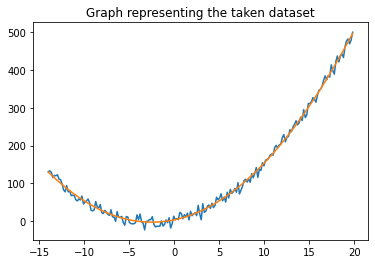

In [3]:
(X_ori, y_ori) = generate()
plt.plot(X_ori[1,:], y_ori)
plt.plot(X_ori[1,:], X_ori[2,:] + 5* X_ori[1,:] + 4* X_ori[0, :])
plt.title("Graph representing the taken dataset")

In [4]:
# Data normalization for proper learning
normal_factor = 10*np.sum(abs(X_ori[2, :]))
X = X_ori/normal_factor
y = y_ori/normal_factor

## Quadratic Regression Model

In [5]:
# The loss function for the model which is summation of |y-ybar|^2 for this case
def criteria(y, ybar, theta):
    th = theta - theta_actual
    return np.sum(np.power(abs(y-ybar), 2)) + lamda*np.dot(th.T, th)[0]

# Function to complete one iteration of the quadratic regression gradient descent
def iteration(X, y, theta, learn):
    der0 = -2*np.sum(y.T-np.dot(theta.T, X).T) + 2*lamda*(theta[0]-theta_actual[0])
    der1 = -2*np.sum(np.multiply(y.T-np.dot(theta.T, X).T, X[1,:])) + 2*lamda*(theta[1]-theta_actual[1])
    der2 = -2*np.sum(np.multiply(y.T-np.dot(theta.T, X).T, X[2,:])) + 2*lamda*(theta[2]-theta_actual[2])
    theta0 = theta[0] - learn * der0
    theta1 = theta[1] - learn * der1
    theta2 = theta[2] - learn * der2
    theta = np.array([theta0, theta1, theta2]).reshape(3, 1)
    return theta

# Main function to control the quadratic regression model
def model_run(X, y):
    # Save the loss values and other quantities for plotting
    val_x, L = [], []
    L_min = 1e9
    
    # Parameters for the model
    theta = np.zeros((3, 1), dtype = float)
    theta_final = theta
    
    # Run the learning process for some number of iterations
    for itera in tqdm(range(iterations)):
        learn = alpha*((beta + itera)**(-1*kappa))
        theta = iteration(X, y, theta, learn)
        val_x.append(itera+1)
        ybar = (np.dot(theta.T, X).T).reshape(N)
        num_L = criteria(y, ybar, theta)
        L.append(num_L)
        if num_L < L_min:
            L_min = num_L
            theta_final = theta
        
    plt.plot(val_x, L)
    plt.title("Loss value vs Number of iterations")
    plt.xlabel("Number of Iterations")
    plt.ylabel("Loss function value")
    
    # Return the learned model parameters at the mininum loss value
    return theta_final

100%|██████████| 30000/30000 [00:07<00:00, 3775.49it/s]


Values of the learned parameters are [4.96255842 2.53934207 1.11377667]
Original parameters are [4 5 1]
Can be observed that the learned parameters are quite close to the original function


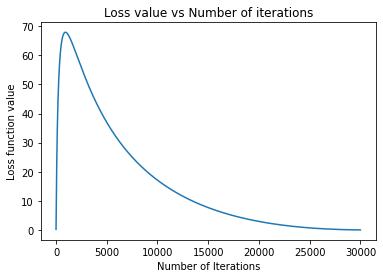

In [6]:
theta = model_run(X, y).T
print(f"Values of the learned parameters are {theta[0]}")
print(f"Original parameters are {theta_actual.T[0]}")
print("Can be observed that the learned parameters are quite close to the original function")

Text(0.5, 1.0, 'Graph representing the learned model')

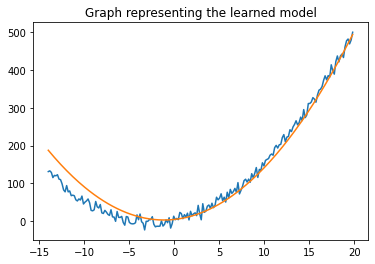

In [7]:
plt.plot(X_ori[1,:], y_ori)
plt.plot(X_ori[1,:], (theta[0][2]* X[2, :] + theta[0][1]* X[1, :] + theta[0][0]* X[0, :]) * normal_factor)
plt.title("Graph representing the learned model")

## Direct optimization based on mathematical calculations

In [8]:
# The parameters can be directly optimized for this loss function by differentiating the loss function wrt all parameters
# and equating the solution to zero.

theta_optimum = np.dot(np.linalg.inv(lamda*np.identity(3) + np.dot(X_ori, X_ori.T)), lamda*theta_actual + np.dot(X_ori, y_ori).reshape(3, 1))
theta_optimum = np.resize(theta_optimum, (3,))
print(f"Optimal Values of the parameters for this loss function are {theta_optimum}")
print(f"Original parameters are {theta_actual.T[0]}")

Optimal Values of the parameters for this loss function are [3.23618232 4.99183502 1.00328818]
Original parameters are [4 5 1]
